In [10]:
import torch
from torch import nn

In [1]:
from sklearn.datasets import make_circles 
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42) #Each data point has two features (X1 and X2) and a corresponding binary label (y).

In [3]:
print(f"First 5 features of X are:\n{X[:5]}")
print(f"First 5 features of Y are:\n{y[:5]}")

First 5 features of X are:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 features of Y are:
[1 1 1 1 0]


In [4]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1],"label": y}) #2D size-mutable Tabular data structure
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [5]:
circles.label.value_counts() #Binary Classification

label
1    500
0    500
Name: count, dtype: int64

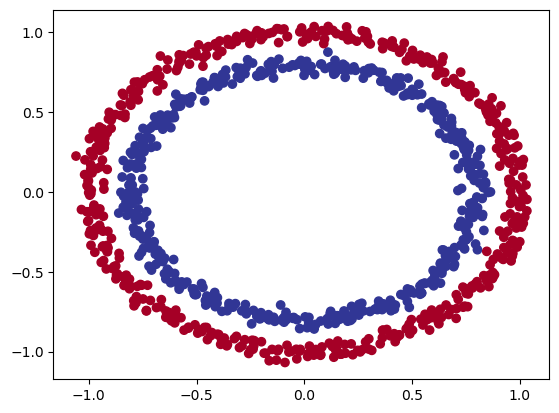

In [6]:
#Plotting the circles
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [7]:
X.shape, y.shape #Two inputs per output

((1000, 2), (1000,))

In [8]:
#Data in tensor (Multi-Dimensional Array) form
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:10], y[:10]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967],
         [-0.4796,  0.6764],
         [-0.0136,  0.8033],
         [ 0.7715,  0.1478],
         [-0.1693, -0.7935],
         [-0.1215,  1.0215]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

In [9]:
#Splitting Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [14]:
#2 Layered Neural Network (2 X's to 5 neurons (hyperparameter) to 1 Y Output)
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
#Making Untrained Predictions
untrained_preds = model_0(X_test)
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[ 0.0253],
        [-0.0102],
        [ 0.1022],
        [ 0.0036],
        [ 0.0764],
        [ 0.0549],
        [-0.0247],
        [-0.0095],
        [ 0.1032],
        [-0.0128]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [47]:
#Binary Cross Entropy Loss (Cost) Function
loss_fn = nn.BCELoss()
#Stochastic Gradient Descent with learning rate of 0.1
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [48]:
#Calculate Accuracy = Correct Predicitions / Total Predictions
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [49]:
#Outputs of Forward Pass (Raw Outputs)
y_logits = model_0(X_test.to())[:5]
y_logits

tensor([[ 0.0072],
        [ 0.0043],
        [ 0.0027],
        [ 0.0085],
        [-0.0167]], grad_fn=<SliceBackward0>)

In [50]:
#Converting Raw Outputs to Prediction Probabilites via Sigmoid Function
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5018],
        [0.5011],
        [0.5007],
        [0.5021],
        [0.4958]], grad_fn=<SigmoidBackward0>)

In [51]:
# Rounding the predicted probabilities
y_preds = torch.round(y_pred_probs)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to())[:5]))
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 0.], grad_fn=<SqueezeBackward0>)

In [52]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [55]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(), y_train.to()
X_test, y_test = X_test.to(), y_test.to()

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze() 
    y_pred = torch.round(torch.sigmoid(y_logits)) 
  
    # 2. Calculate loss/accuracy
    loss = loss_fn(torch.sigmoid(y_logits), y_train) 

    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(torch.sigmoid(test_logits),
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69302, Accuracy: 50.50% | Test loss: 0.69393, Test acc: 46.00%
Epoch: 10 | Loss: 0.69301, Accuracy: 50.50% | Test loss: 0.69398, Test acc: 47.00%
Epoch: 20 | Loss: 0.69301, Accuracy: 50.50% | Test loss: 0.69403, Test acc: 47.00%
Epoch: 30 | Loss: 0.69301, Accuracy: 50.88% | Test loss: 0.69407, Test acc: 47.00%
Epoch: 40 | Loss: 0.69300, Accuracy: 51.00% | Test loss: 0.69411, Test acc: 46.50%
Epoch: 50 | Loss: 0.69300, Accuracy: 51.00% | Test loss: 0.69415, Test acc: 46.00%
Epoch: 60 | Loss: 0.69300, Accuracy: 51.00% | Test loss: 0.69419, Test acc: 46.50%
Epoch: 70 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69422, Test acc: 46.50%
Epoch: 80 | Loss: 0.69299, Accuracy: 51.38% | Test loss: 0.69425, Test acc: 46.00%
Epoch: 90 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69428, Test acc: 46.50%


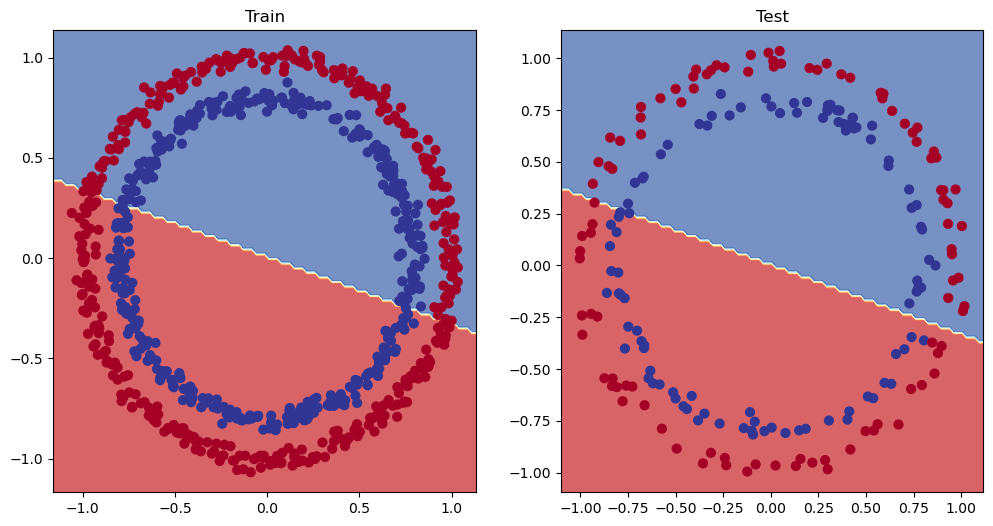

In [59]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [58]:
#As the accuracy is 0.5. Hence, Our Model is Underfitting here, so we should improve the model

In [60]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to()
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [61]:
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [62]:
torch.manual_seed(42)

epochs = 1000
X_train, y_train = X_train.to(), y_train.to()
X_test, y_test = X_test.to(), y_test.to()

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


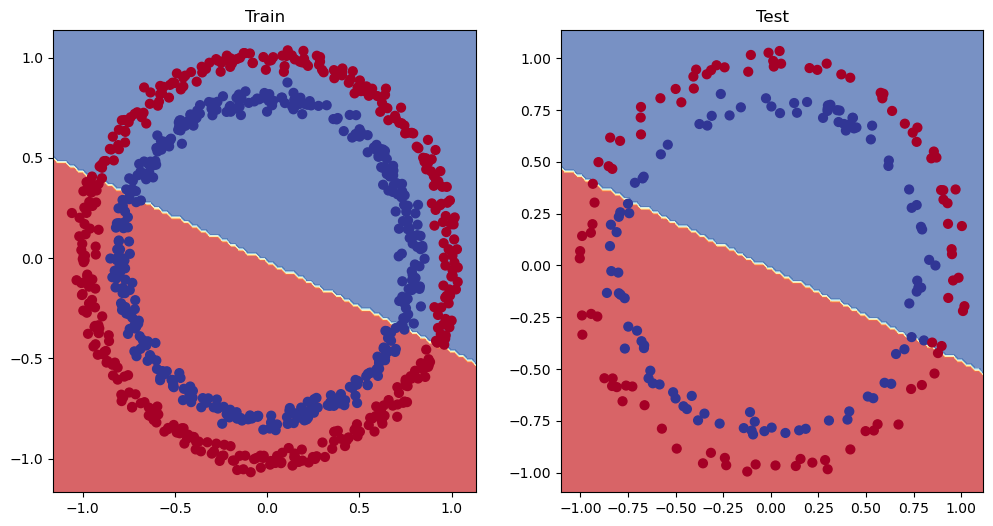

In [63]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

In [64]:
#Still a straight line, so we shall try to model linear data

In [65]:
# Creating some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [66]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

print(len(X_train_regression), 
    len(y_train_regression), 
    len(X_test_regression), 
    len(y_test_regression))

80 80 20 20


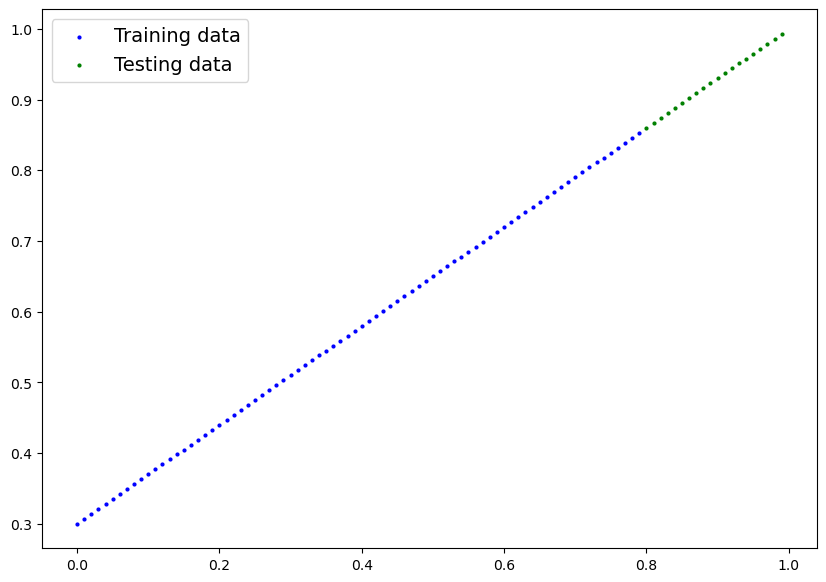

In [67]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

In [68]:
# Same architecture as model_1 
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to()

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [69]:
#L1 Loss is MSE Loss
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [70]:
# Train the model
torch.manual_seed(42)
epochs = 1000
X_train_regression, y_train_regression = X_train_regression.to(), y_train_regression.to()
X_test_regression, y_test_regression = X_test_regression.to(), y_test_regression.to()

for epoch in range(epochs):
    ### Training 
    # 1. Forward pass
    y_pred = model_2(X_train_regression)
    
    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss 
      test_loss = loss_fn(test_pred, y_test_regression)

    if epoch % 100 == 0: 
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.54143
Epoch: 100 | Train loss: 0.09309, Test loss: 0.02901
Epoch: 200 | Train loss: 0.07376, Test loss: 0.02850
Epoch: 300 | Train loss: 0.06745, Test loss: 0.00615
Epoch: 400 | Train loss: 0.06107, Test loss: 0.02004
Epoch: 500 | Train loss: 0.05698, Test loss: 0.01061
Epoch: 600 | Train loss: 0.04857, Test loss: 0.01326
Epoch: 700 | Train loss: 0.06109, Test loss: 0.02127
Epoch: 800 | Train loss: 0.05600, Test loss: 0.01425
Epoch: 900 | Train loss: 0.05571, Test loss: 0.00603


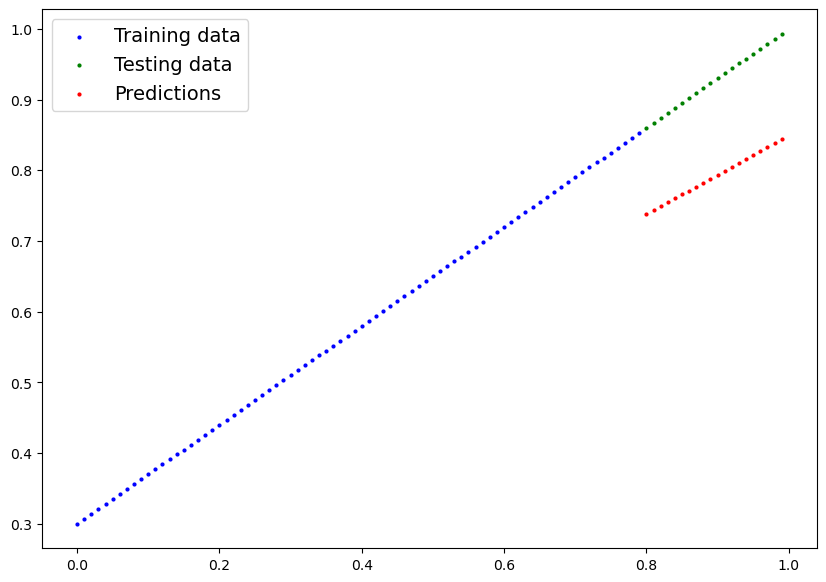

In [71]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=y_preds.cpu());

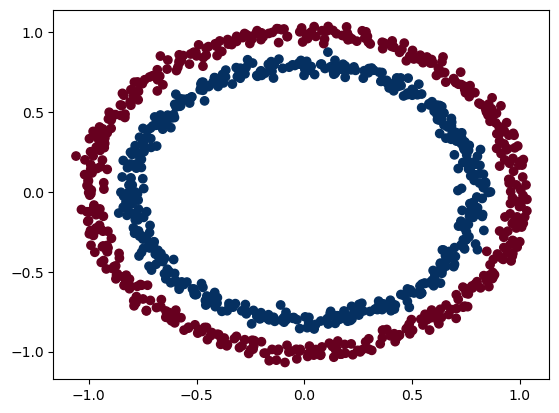

In [72]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [73]:
#Splitting
import torch
from sklearn.model_selection import train_test_split
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [75]:
# Build model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to()
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [76]:
# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [77]:
# Fit the model
torch.manual_seed(42)
epochs = 1000
X_train, y_train = X_train.to(), y_train.to()
X_test, y_test = X_test.to(), y_test.to()

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69441, Accuracy: 50.00% | Test Loss: 0.69360, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69162, Accuracy: 55.12% | Test Loss: 0.69052, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.69074, Accuracy: 50.88% | Test Loss: 0.68922, Test Accuracy: 54.00%
Epoch: 300 | Loss: 0.68975, Accuracy: 51.38% | Test Loss: 0.68775, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68863, Accuracy: 51.38% | Test Loss: 0.68614, Test Accuracy: 56.00%
Epoch: 500 | Loss: 0.68733, Accuracy: 52.00% | Test Loss: 0.68439, Test Accuracy: 56.00%
Epoch: 600 | Loss: 0.68575, Accuracy: 54.75% | Test Loss: 0.68246, Test Accuracy: 57.50%
Epoch: 700 | Loss: 0.68375, Accuracy: 59.75% | Test Loss: 0.68028, Test Accuracy: 62.00%
Epoch: 800 | Loss: 0.68108, Accuracy: 56.75% | Test Loss: 0.67768, Test Accuracy: 58.00%
Epoch: 900 | Loss: 0.67760, Accuracy: 58.63% | Test Loss: 0.67459, Test Accuracy: 60.00%


In [78]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] 

(tensor([0., 0., 1., 0., 0., 1., 1., 1., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

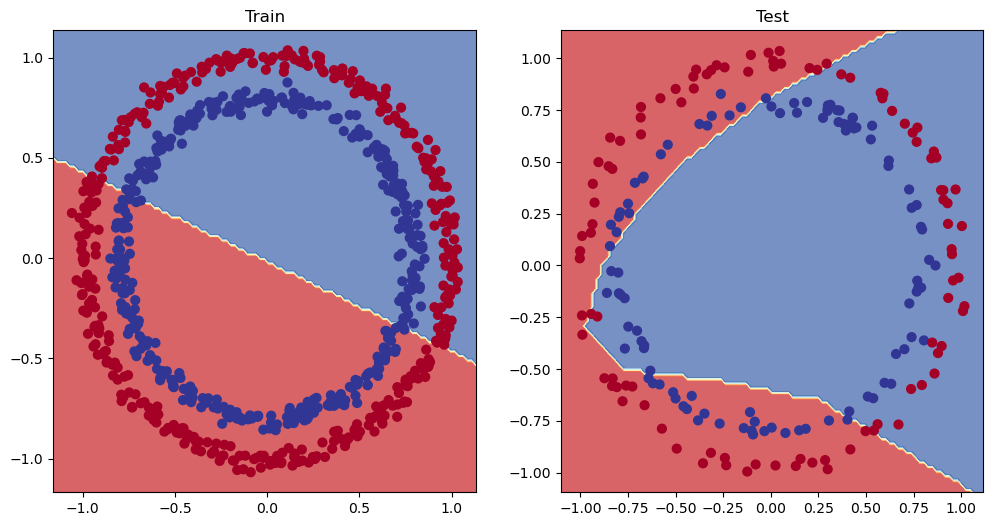

In [79]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

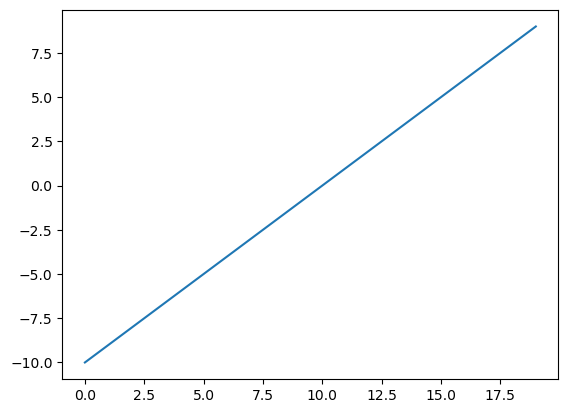

In [80]:
A = torch.arange(-10, 10, 1, dtype=torch.float32)
plt.plot(A)

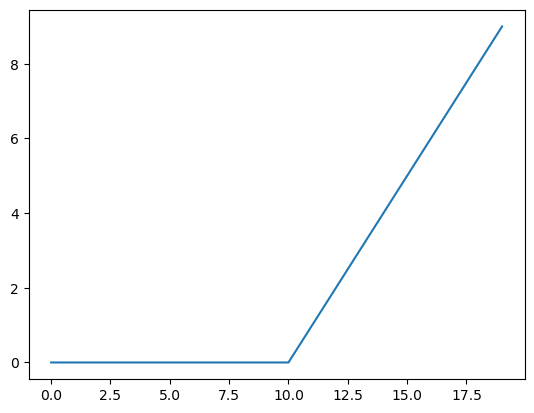

In [82]:
#Manual RELU function
def relu(x):
  return torch.maximum(torch.tensor(0), x)
plt.plot(relu(A));

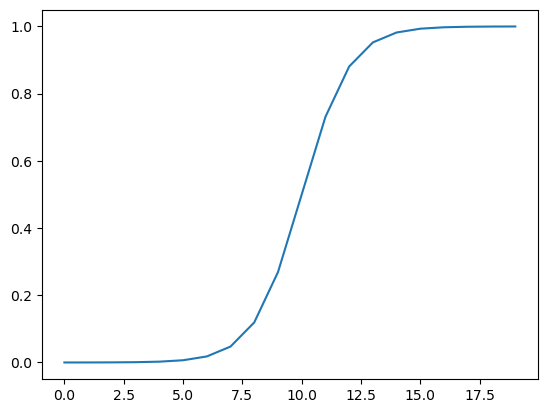

In [83]:
#Manual Sigmoid Function
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))
plt.plot(sigmoid(A))

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


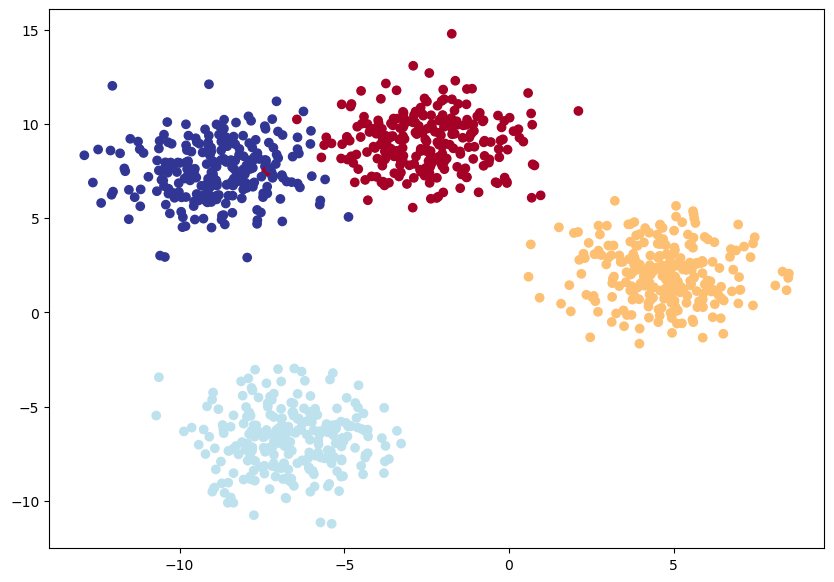

In [84]:
#Multi-Class
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, 
    centers=NUM_CLASSES,  
    cluster_std=1.5, 
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [89]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features),
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)
model_4 = BlobModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES, 
                    hidden_units=8).to()
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [90]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), lr=0.1)

In [92]:
#Making Predictions
y_logits = model_4(X_blob_test.to())

# Perform softmax calculation
y_pred_probs = torch.softmax(y_logits, dim=1) 
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.4360, -0.2618, -0.1064,  0.1442],
        [ 0.0474, -0.9387, -0.4596, -0.0438],
        [ 0.0039, -1.1604, -0.6468,  0.3537],
        [ 0.4114, -0.2208, -0.0243,  0.1781],
        [ 0.2839, -0.6175, -0.3745,  0.0810]], grad_fn=<SliceBackward0>)
tensor([[0.3539, 0.1761, 0.2057, 0.2643],
        [0.3462, 0.1292, 0.2085, 0.3161],
        [0.3075, 0.0960, 0.1604, 0.4362],
        [0.3367, 0.1789, 0.2178, 0.2666],
        [0.3650, 0.1482, 0.1889, 0.2979]], grad_fn=<SliceBackward0>)


In [93]:
# Fit the model
torch.manual_seed(42)
epochs = 100
X_blob_train, y_blob_train = X_blob_train.to(), y_blob_train.to()
X_blob_test, y_blob_test = X_blob_test.to(), y_blob_test.to()

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) #logits -> prediction probabilities -> prediction labels
    print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

tensor([[ 0.4227, -0.2357, -0.0606,  0.1684],
        [ 0.1295, -0.8484, -0.4369,  0.0327],
        [-0.0512, -1.3195, -0.7897,  0.4587],
        ...,
        [ 0.1844, -0.7666, -0.4153,  0.0498],
        [ 0.0129, -1.0935, -0.5965,  0.3823],
        [ 0.0882, -0.8133, -0.3881,  0.0185]], grad_fn=<AddmmBackward0>)
Epoch: 0 | Loss: 1.42824, Acc: 25.62% | Test Loss: 1.29782, Test Acc: 44.00%
tensor([[ 0.4073, -0.2220, -0.0412,  0.1576],
        [ 0.1159, -0.9302, -0.4730,  0.0577],
        [-0.1860, -1.2878, -0.4591, -0.0080],
        ...,
        [ 0.1642, -0.8571, -0.4571,  0.0748],
        [-0.0950, -1.0706, -0.3344,  0.0196],
        [-0.0264, -0.9684, -0.3426, -0.0289]], grad_fn=<AddmmBackward0>)
tensor([[ 0.3997, -0.2063, -0.0342,  0.1525],
        [ 0.1403, -0.9686, -0.5278,  0.1072],
        [-0.2612, -1.3536, -0.2895, -0.1496],
        ...,
        [ 0.1775, -0.9152, -0.5195,  0.1244],
        [-0.1578, -1.1221, -0.1990, -0.0947],
        [-0.1268, -1.1327, -0.3389, -0.0356]], g

In [94]:
# Making predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
y_preds = torch.argmax(y_logits, dim=1) #Directly from predicted Logits to predicted Labels

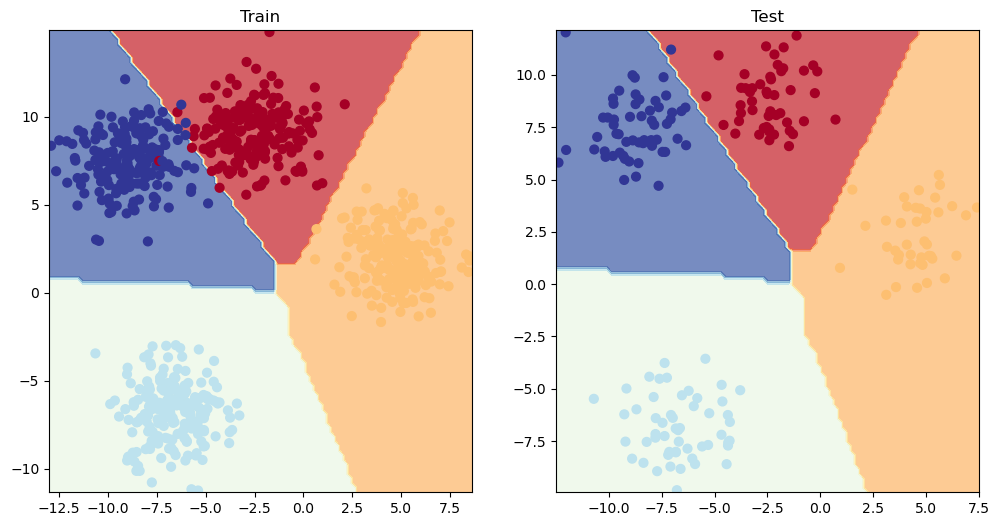

In [95]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [98]:
#Torchmetrics Accuracy
from torchmetrics import Accuracy
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to()
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950)